In [4]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Normalised Output')

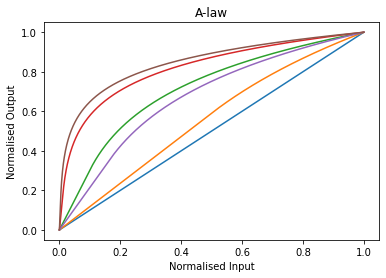

In [30]:
#A-law
x=np.linspace(-1,1,1000)
min=np.min(x)
max=np.max(x)
for k in range(len(x)):
    x[k]=(x[k]-min)/(max-min)
y=np.zeros_like(x)
A=[1,2,10,87,6,255]
for j in range(len(A)):
    for i in range(len(y)):
        if 0 <= abs(x[i]) < 1/A[j]:
            y[i]=(A[j]*abs(x[i]))/(1+np.log(A[j]))
        elif 1/A[j] <= abs(x[i]) <=1:
            y[i]=(np.sign(x[i])*(1+np.log(A[j]*abs(x[i]))))/(1+np.log(A[j]))

    
    plt.plot(x,y)
plt.title("A-law")
plt.xlabel('Normalised Input')
plt.ylabel("Normalised Output")


Text(0, 0.5, 'Normalised Output')

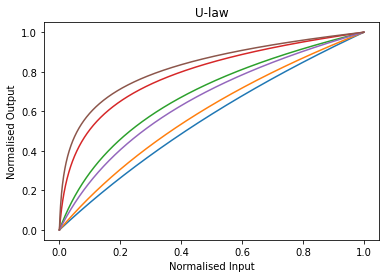

In [28]:
#U-law
x=np.linspace(-1,1,1000)
min=np.min(x)
max=np.max(x)
for k in range(len(x)):
    x[k]=(x[k]-min)/(max-min)
y=np.zeros_like(x)
U=[1,2,10,87,6,255]
for j in range(len(U)):
    for i in range(len(y)):
        if 0<=abs(x[i])<=1:
            y[i]=(np.sign(x[i])*np.log(1+U[j]*abs(x[i])))/np.log(1+U[j])

    
    plt.plot(x,y)
plt.title("U-law")
plt.xlabel('Normalised Input')
plt.ylabel("Normalised Output")

In [34]:
#8-bit U-law decoder
num='00110001'
S=num[1:4]
Q=num[4:8]
S=int(S,2)
Q=int(Q,2)
if S==0:
    y=2*Q+1
else:
    y=((2*Q+33)*2**S)-33
if num[0]=='0':
    print('+',y)
else:
    print('-',y)


+ 247


In [6]:
#8-bit A-law encoder
num='00101110'
S=num[1:4]
Q=num[4:8]
S=int(S,2)
Q=int(Q,2)
y=int((2**S)*(Q+33/2))
if num[0]=='0':
    print('+',y)
else:
    print('-',y)

+ 122


In [32]:
#8-bit U-law encoder
x=122
s=''
if x>0: 
    s+='0'
else: 
    s+='1'
for a in range(0,8):
    if x < 64*(2**a - 33):
        S=a
        break
if S==0:
    r=x
else:
    r=x-32*(2**S - 33)
for b in range(0,16):
    if S==0:
        if r<(2*b-1):
            Q=b
            break
    else:
        if r<(2**(S+1))*(b+1):
            Q=b
            break

s+='{0:03b}'.format(S)+'{0:04b}'.format(Q)
print(s)

01100000


In [33]:
#8-bit A-law encoder
x=122
s=''
if x>0: 
    s+='0'
else: 
    s+='1'
for a in range(0,8):
    if x < 32*2**a:
        S=a
        break
if S==0:
    r=x
else:
    r=x-16*(2*S)
for b in range(0,16):
    if S==0:
        if r<2*(b+1):
            Q=b
            break
    else:
        if r<(2**(S))*(b+1):
            Q=b
            break

s+='{0:03b}'.format(S)+'{0:04b}'.format(Q)
print(s)


00101110
